# The impacts of network topology on disease spread

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue

print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.6.1 |Anaconda custom (64-bit)| (default, Mar 22 2017, 19:54:23) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Funciones de otras practicas importadas como una librería

In [22]:
%reload_ext autoreload
import lib_grafos as lg
file = open('funciones_lib_grafos.txt', 'r')
print(file.read())

def grafo_aleatorio(num_nodos, prob):
def tam_grafo(grafo):
def aleatorio(num_nodos, prob):
def indiceCluster_caminoCar(grafo):
def aleatiorio2(num_nodos, prob):
def calcula_C(grafo):
def calcula_L(grafo):
def calcula_grados(grafo):
def adyacentes(grafo, vertice):
def matrix_to_adyacent(grafo):
def calcula_grados_rapido(grafo, limit):
def get_distro(grados, tam_grafo):
def busqueda_anchura(grafo, nodo_ini=0):
def componentes_conexas(grafo):
def componentes_conexas_nodo(grafo, nodo, cola):
def aleatorio3(N, p):
def create_mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno_print (num_nodos, k, probabilidad):
def libre_escala (num_inicial, num_final, num_ramas):
def libre_escala_print (num_inicial, num_final, num_ramas, l=True):

CONTRUIR GRAFOS

def grafo_aleatorio(num_nodos, prob):
def create_lattice_1D (num_nodos, k):
def rewired_1D (num_nodos, k, probabilidad): // small_word_1D(...)
def create_lattice_2D (num_nodos, k):
def re

## Objeto grafo que guarde las cosas calculadas

In [193]:
class Grafo_obj:
    def __init__(self, grafo, tipo):
        self.grafo=grafo
        self.l=-1
        self.c=-1
        self.g=-1
        self.tipo=tipo
        self.tam=lg.tam_grafo(grafo)
    def set_l(self):
        self.l=lg.calcula_L(self.grafo)
    def set_l2(self):
        self.l=lg.calcula_L2(self.grafo)
    def set_c(self):
        self.c=lg.calcula_C(self.grafo)[0]
    def set_g(self):
        self.g=sum(lg.calcula_grados_rapido(self.grafo, self.tam))/self.tam
    

## Figura 1: ejemplos de las topologías

Voy a guardar las cosas en formato pajek para dibujarlos ahi

In [52]:
def to_pajek(name, grafo):
    f = open('fig1/'+name, 'w')
    f.write('*Vertices '+str(N)+'\n')
    f.write('*Matrix\n')
    for i in range(lg.tam_grafo(grafo)):
        for j in range(lg.tam_grafo(grafo)):
            f.write(str(int(grafo[i][j]))+' ')
        f.write('\n')
    f.close()

N=100
to_pajek('1D_lattice_k4.net', lg.create_lattice_1D(N, 4))
to_pajek('1D_rewired_k4_p005.net', lg.rewired_1D(N, 4, 0.05))
to_pajek('1D_lattice_k6.net', lg.create_lattice_1D(N, 6))
to_pajek('2D_lattice_k4.net', lg.create_lattice_2D(N, 4))
to_pajek('2D_rewired_k4_p005.net', lg.rewired_2D(N, 4, 0.05))
to_pajek('2D_lattice_k8.net', lg.create_lattice_2D(N, 8))
to_pajek('rand_p003.net', lg.grafo_aleatorio(N, 0.03))
to_pajek('rand_p005.net', lg.grafo_aleatorio(N, 0.05))
to_pajek('scale_free_m1.net', lg.scale_free (5, 100, 1))
to_pajek('scale_free_m2.net', lg.scale_free (5, 100, 2))

## Figura 2: selección de parámetros

In [225]:
list_1D_lattice=[]
N=500
for i in range(2, 500, 100):
    list_1D_lattice.append( Grafo_obj( lg.create_lattice_1D(N, i*2), '1D_lattice_k'+str(i) ) )
for elem in list_1D_lattice:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print (elem.tipo)

1D_lattice_k2
1D_lattice_k102
1D_lattice_k202
1D_lattice_k302
1D_lattice_k402


In [131]:
list_2D_lattice=[]
N=484
for i in range(2, 500, 100):
    list_2D_lattice.append( Grafo_obj( lg.create_lattice_2D(N, i*4), '2D_lattice_k'+str(i) ) )
for elem in list_2D_lattice:
    elem.set_l()
    elem.set_g()
    elem.set_c()

In [ ]:
list_random=[]
N=500
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_random.append( Grafo_obj( lg.grafo_aleatorio(N, i), 'Random_p'+str(i) ) )
for elem in list_random:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

In [259]:
list_1D_rewired_4=[]
N=500
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_1D_rewired_4.append( Grafo_obj( lg.rewired_1D (N, 4, i), '1D_rewired_k4_p'+str(i) ))
for elem in list_1D_rewired_4:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

1D_rewired_k4_p0
1D_rewired_k4_p0.0001
1D_rewired_k4_p0.0003
1D_rewired_k4_p0.0006
1D_rewired_k4_p0.001
1D_rewired_k4_p0.003
1D_rewired_k4_p0.006
1D_rewired_k4_p0.01
1D_rewired_k4_p0.03
1D_rewired_k4_p0.06
1D_rewired_k4_p0.1
1D_rewired_k4_p0.3
1D_rewired_k4_p0.6
1D_rewired_k4_p1.0


In [266]:
list_1D_rewired_6=[]
N=500
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_1D_rewired_6.append( Grafo_obj( lg.rewired_1D (N, 6, i), '1D_rewired_k6_p'+str(i) ))
for elem in list_1D_rewired_6:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

1D_rewired_k6_p0
1D_rewired_k6_p0.0001
1D_rewired_k6_p0.0003
1D_rewired_k6_p0.0006
1D_rewired_k6_p0.001
1D_rewired_k6_p0.003
1D_rewired_k6_p0.006
1D_rewired_k6_p0.01
1D_rewired_k6_p0.03
1D_rewired_k6_p0.06
1D_rewired_k6_p0.1
1D_rewired_k6_p0.3
1D_rewired_k6_p0.6
1D_rewired_k6_p1.0


In [267]:
list_1D_rewired_8=[]
N=500
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_1D_rewired_8.append( Grafo_obj( lg.rewired_1D (N, 8, i), '1D_rewired_k8_p'+str(i) ))
for elem in list_1D_rewired_8:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

1D_rewired_k8_p0
1D_rewired_k8_p0.0001
1D_rewired_k8_p0.0003
1D_rewired_k8_p0.0006
1D_rewired_k8_p0.001
1D_rewired_k8_p0.003
1D_rewired_k8_p0.006
1D_rewired_k8_p0.01
1D_rewired_k8_p0.03
1D_rewired_k8_p0.06
1D_rewired_k8_p0.1
1D_rewired_k8_p0.3
1D_rewired_k8_p0.6
1D_rewired_k8_p1.0


In [268]:
list_2D_rewired_8=[]
N=484
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_2D_rewired_8.append( Grafo_obj( lg.rewired_2D (N, 8, i), '2D_rewired_k8_p'+str(i) ))
for elem in list_2D_rewired_8:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

2D_rewired_k8_p0
2D_rewired_k8_p0.0001
2D_rewired_k8_p0.0003
2D_rewired_k8_p0.0006
2D_rewired_k8_p0.001
2D_rewired_k8_p0.003
2D_rewired_k8_p0.006
2D_rewired_k8_p0.01
2D_rewired_k8_p0.03
2D_rewired_k8_p0.06
2D_rewired_k8_p0.1
2D_rewired_k8_p0.3
2D_rewired_k8_p0.6
2D_rewired_k8_p1.0


In [269]:
list_2D_rewired_12=[]
N=484
probs=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
for i in probs:
    list_2D_rewired_12.append( Grafo_obj( lg.rewired_2D (N, 12, i), '2D_rewired_k12_p'+str(i) ))
for elem in list_2D_rewired_12:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

2D_rewired_k12_p0
2D_rewired_k12_p0.0001
2D_rewired_k12_p0.0003
2D_rewired_k12_p0.0006
2D_rewired_k12_p0.001
2D_rewired_k12_p0.003
2D_rewired_k12_p0.006
2D_rewired_k12_p0.01
2D_rewired_k12_p0.03
2D_rewired_k12_p0.06
2D_rewired_k12_p0.1
2D_rewired_k12_p0.3
2D_rewired_k12_p0.6
2D_rewired_k12_p1.0


In [288]:
list_scale_free=[]
N=500
probs=[1, 4, 8, 12, 18]
for i in probs:
    list_scale_free.append( Grafo_obj( lg.scale_free (50, N, i), 'Scale_free_m'+str(i) ) )
#for elem in list_scale_free:
    #elem.grafo = lg.fix_no_vecinos(elem.grafo)
for elem in list_scale_free:
    elem.set_l()
    elem.set_g()
    elem.set_c()
    print(elem.tipo)

Scale_free_m1
Scale_free_m4
Scale_free_m8
Scale_free_m12
Scale_free_m18


In [256]:
sfc=[]
sfl=[]
sfc.append(list_scale_free[0].c)
sfl.append(list_scale_free[0].l)
sfc.append(list_scale_free[3].c)
sfl.append(list_scale_free[1].l)
sfc.append(list_scale_free[2].c)
sfl.append(list_scale_free[2].l)
sfc.append(list_scale_free[4].c)
sfl.append(list_scale_free[3].l)
sfc.append(list_scale_free[1].c)
sfl.append(list_scale_free[4].l)
sfc.append(0.4)
sfl.append(1.6)
print(sfc)
print(sfl)

[0.029320072306340227, 0.1182825686914166, 0.12884014447195682, 0.1390596797134957, 0.16168453320968962, 0.4]
[3.5216593186372727, 2.7195591182364707, 2.439366733466934, 2.238372745490982, 2.03918236472946, 1.6]


### Graficas

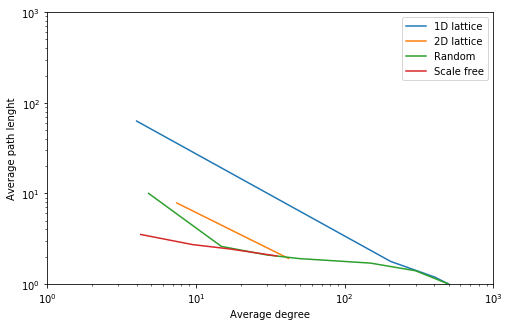

In [277]:
################ g vs l
plt.figure(figsize=(8,5))
plt.xscale('log')
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
for elem in list_1D_lattice:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
for elem in list_2D_lattice:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='Scale free')
################ FIN
plt.xlabel('Average degree')
plt.ylabel('Average path lenght')
plt.legend()
plt.xlim([1, 1000])
plt.ylim([1, 1000])
plt.show()
    

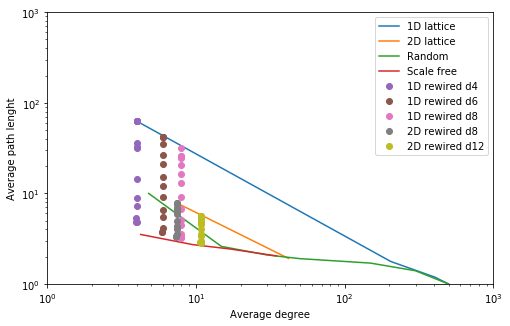

In [278]:
################ g vs l
plt.figure(figsize=(8,5))
plt.xscale('log')
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
for elem in list_1D_lattice:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
for elem in list_2D_lattice:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, label='Scale free')
##
ad=[]
apl=[]
for elem in list_1D_rewired_4:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, 'o', label='1D rewired d4')
##
ad=[]
apl=[]
for elem in list_1D_rewired_6:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, 'o', label='1D rewired d6')
##
ad=[]
apl=[]
for elem in list_1D_rewired_8:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, 'o', label='1D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_8:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, 'o', label='2D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_12:
    ad.append(elem.g)
    apl.append(elem.l)
plt.plot(ad, apl, 'o', label='2D rewired d12')
################ FIN
plt.xlabel('Average degree')
plt.ylabel('Average path lenght')
plt.xlim([1, 1000])
plt.ylim([1, 1000])
plt.legend()
plt.show()

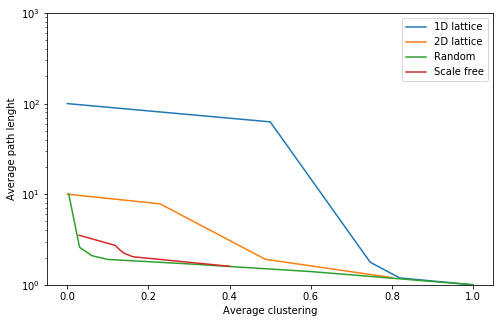

In [280]:
################ c vs l
plt.figure(figsize=(8,5))
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
ad.append(0)
apl.append(100)
for elem in list_1D_lattice:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
ad.append(0)
apl.append(10)
for elem in list_2D_lattice:
    ad.append(elem.c)
    apl.append(elem.l)
ad.append(0.8)
apl.append(1.2)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(sfc, sfl, label='Scale free')
################ FIN
plt.xlabel('Average clustering')
plt.ylabel('Average path lenght')
plt.legend()
plt.ylim([1, 1000])
plt.show()
    

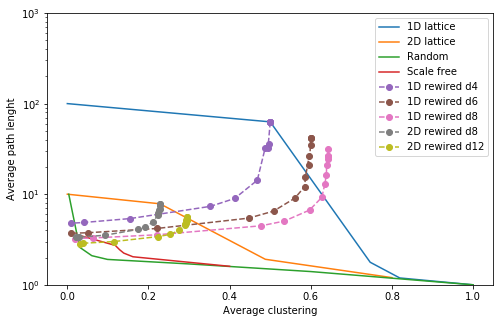

In [286]:
################ c vs l
plt.figure(figsize=(8,5))
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
ad.append(0)
apl.append(100)
for elem in list_1D_lattice:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
ad.append(0)
apl.append(10)
for elem in list_2D_lattice:
    ad.append(elem.c)
    apl.append(elem.l)
ad.append(0.8)
apl.append(1.2)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(sfc, sfl, label='Scale free')
##
ad=[]
apl=[]
for elem in list_1D_rewired_4:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, 'o--', label='1D rewired d4')
##
ad=[]
apl=[]
for elem in list_1D_rewired_6:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, 'o--', label='1D rewired d6')
##
ad=[]
apl=[]
for elem in list_1D_rewired_8:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, 'o--', label='1D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_8:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, 'o--', label='2D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_12:
    ad.append(elem.c)
    apl.append(elem.l)
plt.plot(ad, apl, 'o--', label='2D rewired d12')
################ FIN
plt.xlabel('Average clustering')
plt.ylabel('Average path lenght')
plt.legend()
plt.ylim([1, 1000])
plt.show()
    

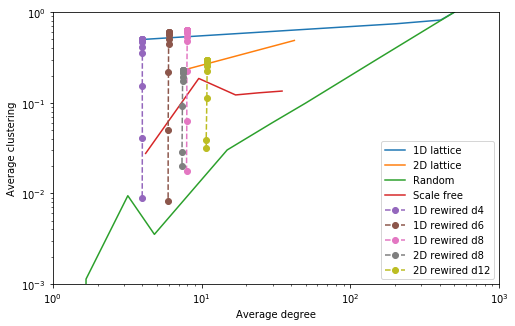

In [289]:
################ g vs c
plt.figure(figsize=(8,5))
plt.xscale('log')
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
for elem in list_1D_lattice:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
for elem in list_2D_lattice:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='Scale free')
##
ad=[]
apl=[]
for elem in list_1D_rewired_4:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, 'o--', label='1D rewired d4')
##
ad=[]
apl=[]
for elem in list_1D_rewired_6:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, 'o--', label='1D rewired d6')
##
ad=[]
apl=[]
for elem in list_1D_rewired_8:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, 'o--', label='1D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_8:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, 'o--', label='2D rewired d8')
##
ad=[]
apl=[]
for elem in list_2D_rewired_12:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, 'o--', label='2D rewired d12')
################ FIN
plt.xlabel('Average degree')
plt.ylabel('Average clustering')
plt.xlim([1, 1000])
plt.ylim([0.001, 1])
plt.legend()
plt.show()
    

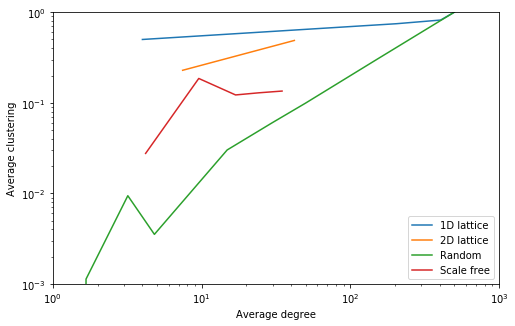

In [290]:
################ g vs c
plt.figure(figsize=(8,5))
plt.xscale('log')
plt.yscale('log')
################ 1D lattice
ad=[]
apl=[]
for elem in list_1D_lattice:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='1D lattice')
################ 2D lattice
ad=[]
apl=[]
for elem in list_2D_lattice:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='2D lattice')
################ Random
ad=[]
apl=[]
for elem in list_random:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='Random')
################ Scale free
ad=[]
apl=[]
for elem in list_scale_free:
    ad.append(elem.g)
    apl.append(elem.c)
plt.plot(ad, apl, label='Scale free')
################ FIN
plt.xlabel('Average degree')
plt.ylabel('Average clustering')
plt.xlim([1, 1000])
plt.ylim([0.001, 1])
plt.legend()
plt.show()

## Figura 3: distribucion de los seleccionados

In [294]:
g_regulares=[]
g_scale_free=[]
g_lattice_1D=[]
g_lattice_2D=[]
g_rewired_1D=[]
g_rewired_2D=[]
for i in range(3):
    g_regulares.append( Grafo_obj( lg.grafo_aleatorio(500, 0.015), 'Random_p0015' ) )
for i in range(2):
    g_scale_free.append( Grafo_obj( lg.scale_free (50, 500, 4), 'Scale_free_m4' ) )
    g_rewired_1D.append( Grafo_obj( lg.rewired_1D (500, 8, 0.05), 'Rewired_1D_k8_p005' ) )
    g_rewired_2D.append( Grafo_obj( lg.rewired_2D (484, 8, 0.05), 'Rewired_2D_k8_p005' ) )
g_lattice_1D.append( Grafo_obj( lg.create_lattice_1D (500, 8), 'Lattice_1D_k8' ) )
g_lattice_2D.append( Grafo_obj( lg.create_lattice_2D (484, 8), 'Lattice_2D_k8' ) )
gs=[]
gs.append(g_regulares)
gs.append(g_scale_free)
gs.append(g_lattice_1D)
gs.append(g_lattice_2D)
gs.append(g_rewired_1D)
gs.append(g_rewired_2D)

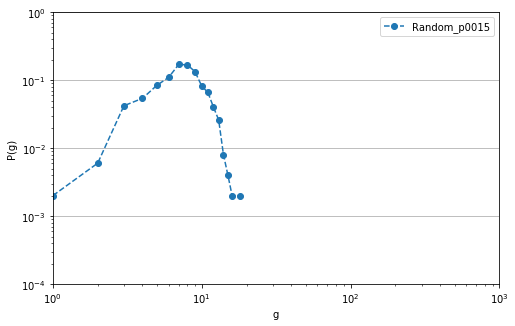

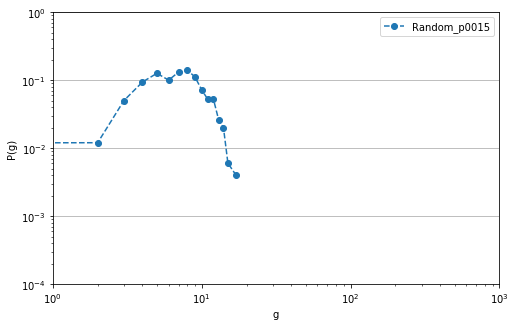

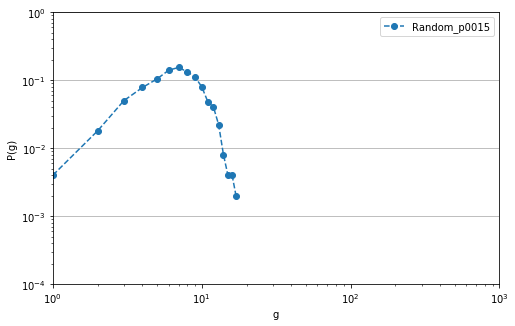

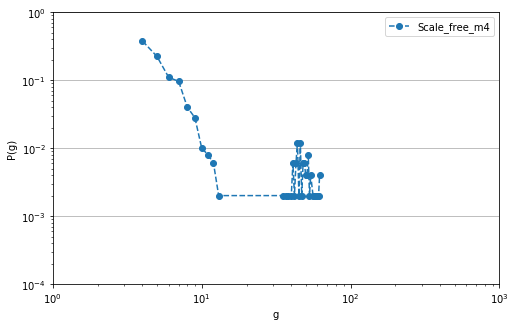

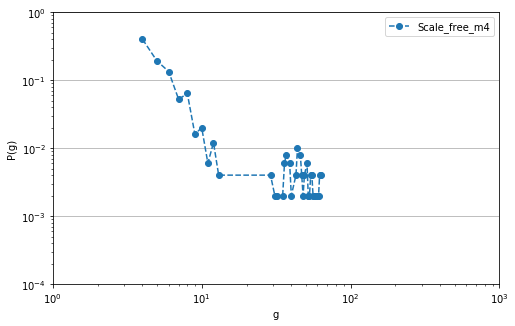

/home/manur/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


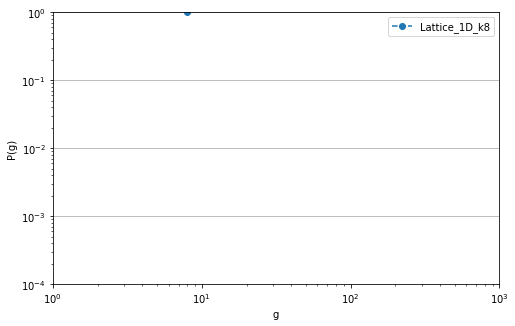

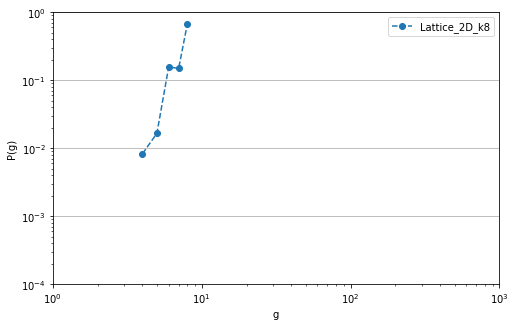

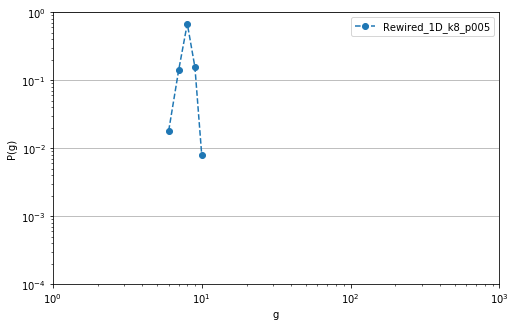

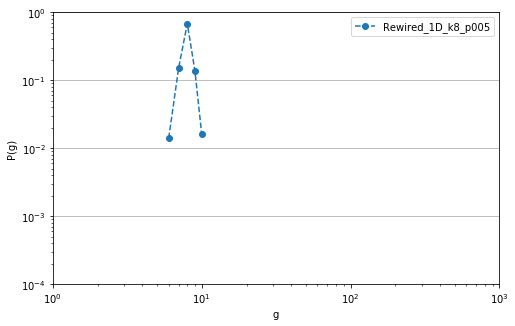

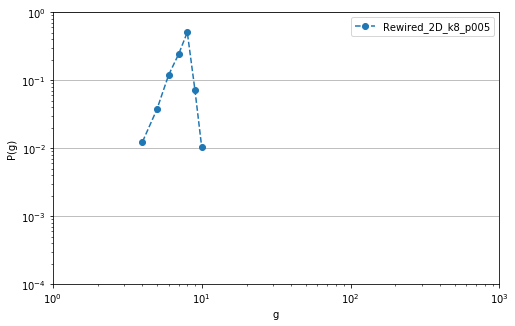

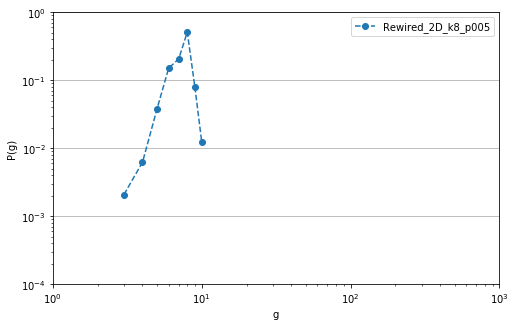

In [323]:
for lista in gs:
    for elem in lista:
        grados = lg.calcula_grados_rapido(elem.grafo, lg.tam_grafo(elem.grafo))
        dist = lg.get_distro(grados, lg.tam_grafo(elem.grafo))
        dist_a=[]
        dist_b=[]
        for i in range(len(dist)):
            if dist[i]!=0:
                dist_a.append(dist[i])
                dist_b.append(i)
        suma=sum(dist_a)
        for i in range(len(dist_a)):
            dist_a[i]=dist_a[i]/suma
        plt.figure(figsize=(8,5))
        plt.xscale('log')
        plt.yscale('log')
        plt.plot(dist_b, dist_a, 'o--', label=elem.tipo)
        plt.xlabel('g')
        plt.ylabel('P(g)')
        plt.legend()
        plt.xlim([1, 1000])
        plt.ylim([0.0001, 1])
        plt.grid(axis='y')
        plt.show()